In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from datetime import datetime
import numpy as np
from math import sin, pi

seq_len = 300
return_len = 50

In [ ]:
df = pd.read_csv('./good_sber_1min_2023.csv', delimiter=',')
# Convert str to datetime in column "date"
"%Y-%m-%dT%H:%M:%SZ"
#df["date"] = pd.Series([datetime.strptime(x[:-6], "%Y-%m-%dT%H:%M:%S%Z" ) for x in df["date"]])
df['date'] = df["date"].apply(lambda x: datetime.fromisoformat(x[:-1]))
df.drop(columns=['name', 'Unnamed: 0'], inplace=True)
#df.(df["date"], inplace=True)
print(df.head())
print(df.tail())

                 date    open   close    high     low  volume
0 2023-01-01 09:00:00  141.06  141.06  141.06  141.06     415
1 2023-01-01 09:01:00  140.62  140.84  141.26  139.98     864
2 2023-01-01 09:02:00  140.85  139.88  140.85  139.88     256
3 2023-01-01 09:03:00  140.60  139.63  140.86  139.63     518
4 2023-01-01 09:04:00  140.38  140.50  140.50  139.60     146
                     date    open   close    high     low  volume
71048 2023-04-10 20:45:00  222.10  222.17  222.18  222.10    5213
71049 2023-04-10 20:46:00  222.17  222.22  222.22  222.16    5796
71050 2023-04-10 20:47:00  222.20  222.20  222.26  222.18   16178
71051 2023-04-10 20:48:00  222.19  222.21  222.23  222.12   12025
71052 2023-04-10 20:49:00  222.22  222.21  222.24  222.13   14463


In [ ]:
df["day_of_week"] = df["date"].apply(lambda x: sin(2*pi * x.weekday() / 7))
# df['day_of_year'] = df['date'].apply(lambda x: sin(2*pi * x.timetuple().tm_yday / 365))
df['time_of_day'] = df['date'].apply(lambda x: sin(2*pi*((x.time().hour - 9) * 60 + x.time().minute) / (15*60)))
df.head()

,date,open,close,high,low,volume,day_of_week,time_of_day
0,2023-01-01 09:00:00,141.06,141.06,141.06,141.06,415,-0.781831,0.000000
1,2023-01-01 09:01:00,140.62,140.84,141.26,139.98,864,-0.781831,0.006981
2,2023-01-01 09:02:00,140.85,139.88,140.85,139.88,256,-0.781831,0.013962
3,2023-01-01 09:03:00,140.60,139.63,140.86,139.63,518,-0.781831,0.020942
4,2023-01-01 09:04:00,140.38,140.50,140.50,139.60,146,-0.781831,0.027922


In [ ]:
'''Normalize price columns'''

close_a = np.mean(df['close'])
close_b = np.std(df['close'])

df['open'] = (df['open']-np.mean(df['open']))/np.std(df['open'])
df['high'] = (df['high']-np.mean(df['high']))/np.std(df['high'])
df['low'] = (df['low']-np.mean(df['low']))/np.std(df['low']) 
df['close'] = (df['close']-np.mean(df['close']))/np.std(df['close'])
df['volume'] = (df['volume']-np.mean(df['volume']))/np.std(df['volume'])

df.head()

,date,open,close,high,low,volume,day_of_week,time_of_day
0,2023-01-01 09:00:00,-1.290300,-1.290381,-1.294219,-1.285740,-0.321956,-0.781831,0.000000
1,2023-01-01 09:01:00,-1.308836,-1.299648,-1.285802,-1.331292,-0.298237,-0.781831,0.006981
2,2023-01-01 09:02:00,-1.299147,-1.340088,-1.303057,-1.335510,-0.330356,-0.781831,0.013962
3,2023-01-01 09:03:00,-1.309678,-1.350619,-1.302636,-1.346054,-0.316515,-0.781831,0.020942
4,2023-01-01 09:04:00,-1.318946,-1.313970,-1.317786,-1.347320,-0.336167,-0.781831,0.027922


In [ ]:
times = df.index.values
last_10pct = df.index.values[-int(0.1*len(times))] # Last 10% of series
last_20pct = df.index.values[-int(0.2*len(times))] # Last 20% of series

In [ ]:
###############################################################################
'''Create training, validation and test split'''

df_train = df[(df.index < last_20pct)].copy()  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)].copy()
df_test = df[(df.index >= last_10pct)].copy()

# Remove date column
df_train.drop(columns=['date'], inplace=True)
df_val.drop(columns=['date'], inplace=True)
df_test.drop(columns=['date'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

Training data shape: (56843, 7)
Validation data shape: (7105, 7)
Test data shape: (7105, 7)


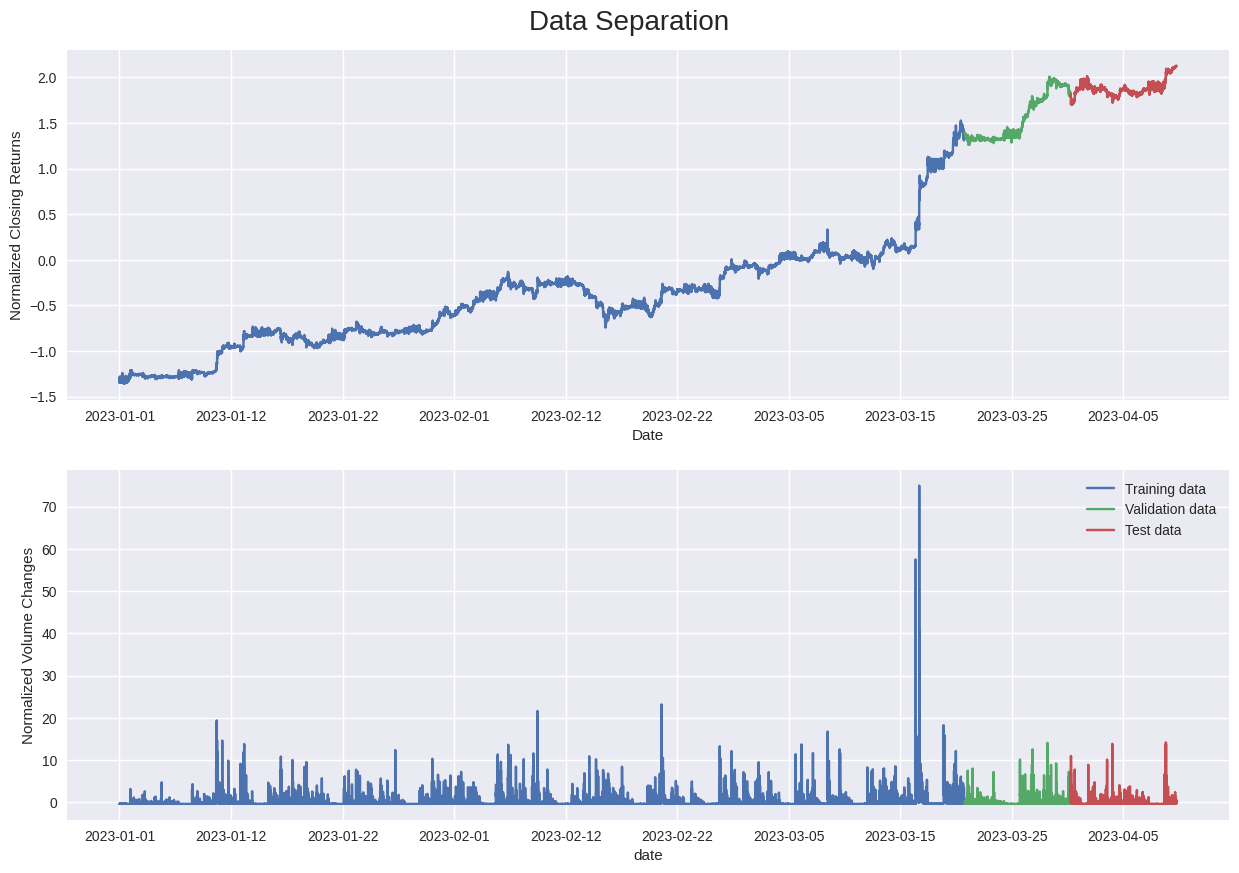

In [ ]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.92)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')

ax1.set_xticks(range(0, df.shape[0], 7500))
ax1.set_xticklabels([y.date() for y in df['date'].loc[::7500]])

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]), df_val['volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0], 
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['volume'], label='Test data')
ax2.set_xlabel('date')
ax2.set_ylabel('Normalized Volume Changes')
ax2.set_xticks(range(0, df.shape[0], 7500))
ax2.set_xticklabels([y.date() for y in df['date'].loc[::7500]])

plt.legend(loc='best')
plt.savefig("data_sep_1_min_many.png", dpi=300)
plt.show()

In [ ]:
# Training data
X_train, y_train = [], []
for i in range(seq_len + return_len, len(train_data)):
  X_train.append(train_data[i-seq_len-return_len:i-return_len]) # Chunks of training data with a length of [seq_len] df-rows
  y_train.append(train_data[:, 3][i-return_len:i]) #Value of 4th column (Close Price) of df-row [seq_len + 1]
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len+return_len, len(val_data)):
    X_val.append(val_data[i-seq_len-return_len:i-return_len])
    y_val.append(val_data[:, 3][i-return_len:i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len+return_len, len(test_data)):
    X_test.append(test_data[i-seq_len-return_len:i-return_len])
    y_test.append(test_data[:, 3][i-return_len:i])    
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
y_train.shape

(56493, 50)

In [ ]:
X_train.shape

(56493, 300, 7)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
print('Tensorflow version: {}'.format(tf.__version__))
import warnings
warnings.filterwarnings('ignore')

Tensorflow version: 2.12.0


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14734113318087750420
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14343274496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3995190826329479536
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
def create_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(128, input_shape=(seq_len, 7), return_sequences=True))
  model.add(tf.keras.layers.LSTM(128, return_sequences=True))
  model.add(tf.keras.layers.LSTM(64))
  model.add(tf.keras.layers.Dense(return_len))#, activation=tf.nn.relu))
  model.compile(optimizer="Adam", loss="mean_squared_error")
  return model

In [ ]:
model = create_model()

model.summary()

model.fit(X_train, y_train,
              batch_size=32,
              epochs=25,
              validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 300, 128)          69632     
                                                                 
 lstm_4 (LSTM)               (None, 300, 128)          131584    
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 50)                3250      
                                                                 
Total params: 253,874
Trainable params: 253,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
1766/1766 [==============================] - 60s 31ms/step - loss: 0.0031 - val_loss: 0.0645
Epoch 2/25
1766/1766 [==============================] - 53s 30ms/step - loss

In [ ]:
model.save("model_500_1min_sber_2023_many.keras")

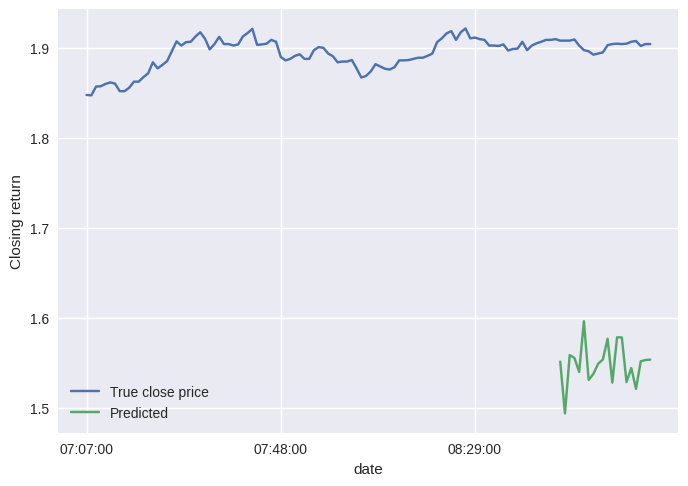

In [ ]:
idx = 2000
seq_len = 100
pred = model(np.array([X_test[idx]]), training=False)
pred = pred[0]

plt.plot(np.arange(seq_len + return_len), test_data[idx: idx + seq_len + return_len, 3], label='True close price')
plt.plot(np.arange(seq_len, seq_len + return_len), pred, label='Predicted')

plt.xticks(ticks=range(0, seq_len + return_len, 41), labels=[y.time() for y in df['date'].loc[last_10pct+idx: idx + last_10pct + seq_len + return_len:41]])
plt.xlabel("date")
plt.ylabel("Closing return")
plt.title("Validation")
plt.legend(loc='best')
plt.show()

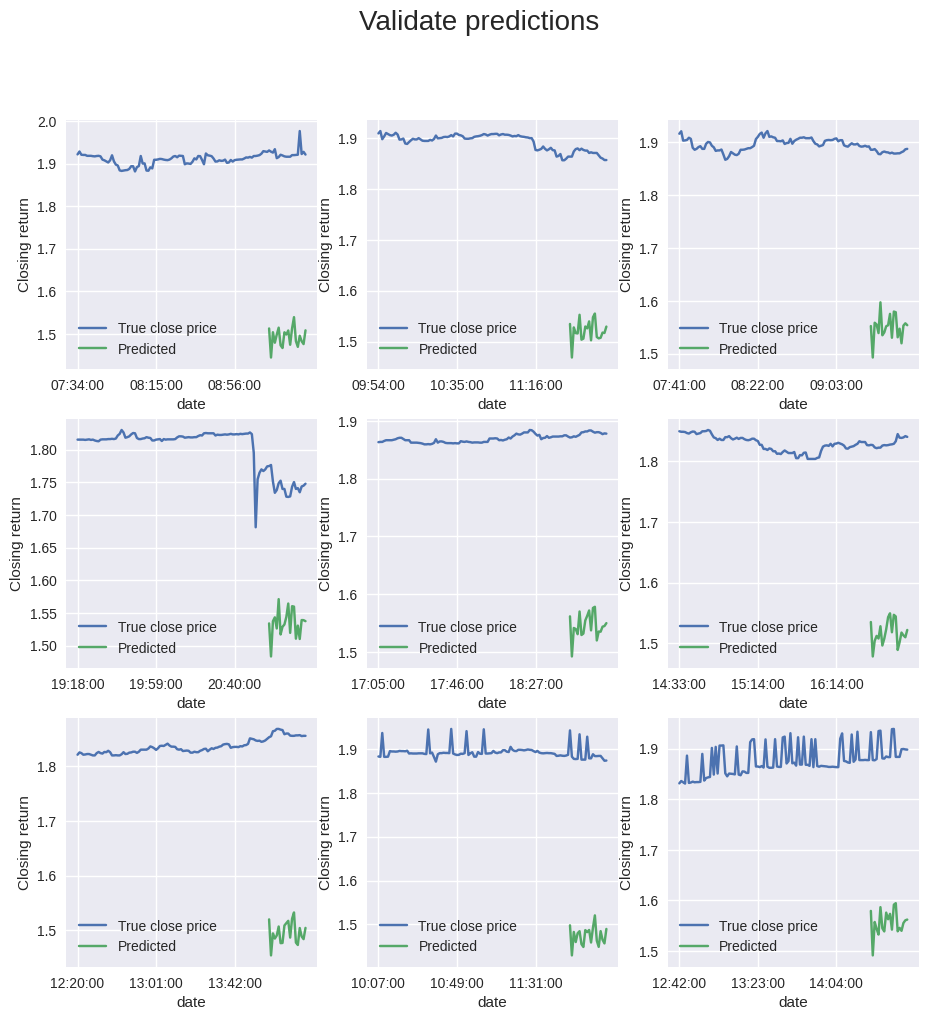

In [ ]:
seq_len = 100

fig, axs = plt.subplots(3, 3, figsize=(11, 11))
fig.suptitle('Validate predictions', fontsize=20)


for i in range(9):
    idx = (X_test.shape[0] // 10) * (i+1)
    pred = model(np.array([X_test[idx]]), training=False)
    pred = pred[0]

    ax = axs[i // 3, i % 3]
    ax.plot(np.arange(seq_len + return_len), test_data[idx: idx + seq_len + return_len, 3], label='True close price')
    ax.plot(np.arange(seq_len, seq_len + return_len), pred, label='Predicted')

    ax.set(xlabel="date", ylabel="Closing return")
    ax.set_xticks(ticks=range(0, seq_len + return_len, 41), labels=[y.time() for y in df['date'].loc[last_10pct+idx: idx + last_10pct + seq_len + return_len:41]])
    ax.legend()

fig.savefig("sber_many_validation.png")
plt.show()